In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
all_data = pd.read_csv('pancreatic_merge.tsv', sep='\t')

In [14]:
all_data.head()

,index,name,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,FibroP|DNase|None,Gliobla|DNase|None,GM12891|DNase|None,...,Osteoblasts|H2A.Z|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None,Osteoblasts|H4K20me1|None
0,0,PLCH1_ENST00000334686,0.004860,0.001700,0.00544,0.000502,0.03200,0.01090,0.001530,0.000708,...,0.00571,0.01620,0.0814,0.3080,0.0212,0.01270,0.00455,0.1100,0.02550,0.05100
1,1,ZEB2_ENST00000637045,0.006890,0.005700,0.00652,0.000620,0.03020,0.01300,0.004910,0.001340,...,0.00335,0.15400,0.0141,0.7690,0.1710,0.16800,0.07390,0.5650,0.00921,0.46300
2,2,TNNI3K,0.002550,0.001260,0.00323,0.000771,0.02290,0.01270,0.001470,0.002700,...,0.00223,0.00635,0.1220,0.0354,0.0118,0.00506,0.00146,0.0102,0.03750,0.00508
3,3,MORC1,0.000582,0.000937,0.00170,0.000111,0.00994,0.00403,0.000302,0.000170,...,0.00946,0.10200,0.0771,0.0962,0.1820,0.08420,0.02590,0.0285,0.01310,0.00854
4,4,PLCH1_ENST00000460012,0.007610,0.004960,0.00842,0.000698,0.04830,0.02070,0.003900,0.001120,...,0.00695,0.03100,0.0830,0.3890,0.0397,0.02220,0.00810,0.1630,0.02740,0.08140


In [17]:
column_sums = np.empty(0)

for i in np.arange(len(all_data.columns) - 2):
    column_name = all_data.columns[i+2]
    column_sums = np.append(column_sums, np.sum(all_data[column_name]))

In [18]:
column_names = all_data.columns[2:]
assert len(column_names) == len(column_sums)

In [19]:
sums_df = pd.DataFrame()
sums_df['Index'] = np.arange(len(column_sums))
sums_df['Sums'] = column_sums

<AxesSubplot:xlabel='Index', ylabel='Sums'>

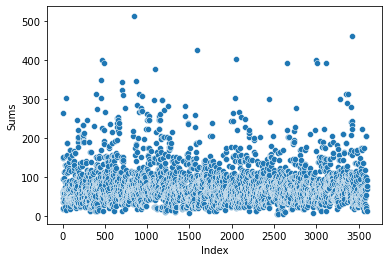

In [23]:
import seaborn as sns
rows_df = pd.DataFrame()
rows_df['Sums'] = all_data[all_data.columns[1:]].sum(axis=1)
rows_df['Index'] = np.arange(len(rows_df['Sums']))
sns.scatterplot(data=rows_df, x='Index', y='Sums')

In [29]:
np.percentile(np.array(rows_df['Sums']), 97.5)

223.53749090560004

In [31]:
significant_rows = (np.array(all_data['name']) * (np.array(rows_df['Sums']) > 224))
significant_rows = significant_rows[significant_rows != '']


In [32]:
significant_rows, len(significant_rows)

(array(['DLGAP2', 'DLGAP2_ENST00000421627', 'DSCAML1',
        'SMARCA4_ENST00000642628', 'SMARCA4_ENST00000642726', 'DSCAML1',
        'ZIC1', 'RBFOX1_ENST00000641259', 'SLITRK1',
        'CELF2_ENST00000636488', 'CELF2_ENST00000637215',
        'HDAC9_ENST00000406451', 'ADARB2', 'HDAC9', 'FAM155A', 'ARHGAP6',
        'DYSF_ENST00000258104', 'DYSF_ENST00000409582',
        'DYSF_ENST00000409762', 'DYSF_ENST00000429174',
        'DYSF_ENST00000394120', 'DYSF_ENST00000409744',
        'DYSF_ENST00000410041', 'DYSF_ENST00000409366',
        'PLEC_ENST00000527096', 'PLEC_ENST00000436759',
        'PLEC_ENST00000356346', 'FMN2', 'FBXL17', 'DACH1_ENST00000620444',
        'DACH1_ENST00000611519', 'PLEC_ENST00000354958', 'PLEC',
        'PLEC_ENST00000398774', 'PLEC_ENST00000354589',
        'PLEC_ENST00000345136', 'PLEC_ENST00000357649',
        'CACNA1A_ENST00000614285', 'CACNA1A_ENST00000637736',
        'CACNA1A_ENST00000360228', 'CACNA1A_ENST00000636012', 'CACNA1A',
        'CACNA1A_ENS

In [33]:
for i in np.arange(len(significant_rows)):
    significant_rows[i] = significant_rows[i].partition('_')[0]

In [34]:
thresholded = pd.DataFrame()
thresholded['Thresholded'] = significant_rows
index = np.arange(len(thresholded))
thresholded['Index'] = index
thresholded = thresholded.groupby(['Thresholded'])['Thresholded'].value_counts().to_frame('Count')
thresholded['Thresholded'] = thresholded.index.droplevel(1)
thresholded = thresholded.reset_index(drop=True)

In [35]:
thresholded

,Count,Thresholded
0,1,ADARB2
1,1,AGAP1
2,2,AR
3,1,ARHGAP6
4,12,CACNA1A
5,9,CELF2
6,2,DACH1
7,4,DLGAP2
8,2,DSCAML1
9,10,DYSF


In [36]:
thresholded.to_csv('pancreatic_cancer_prioritized.csv')